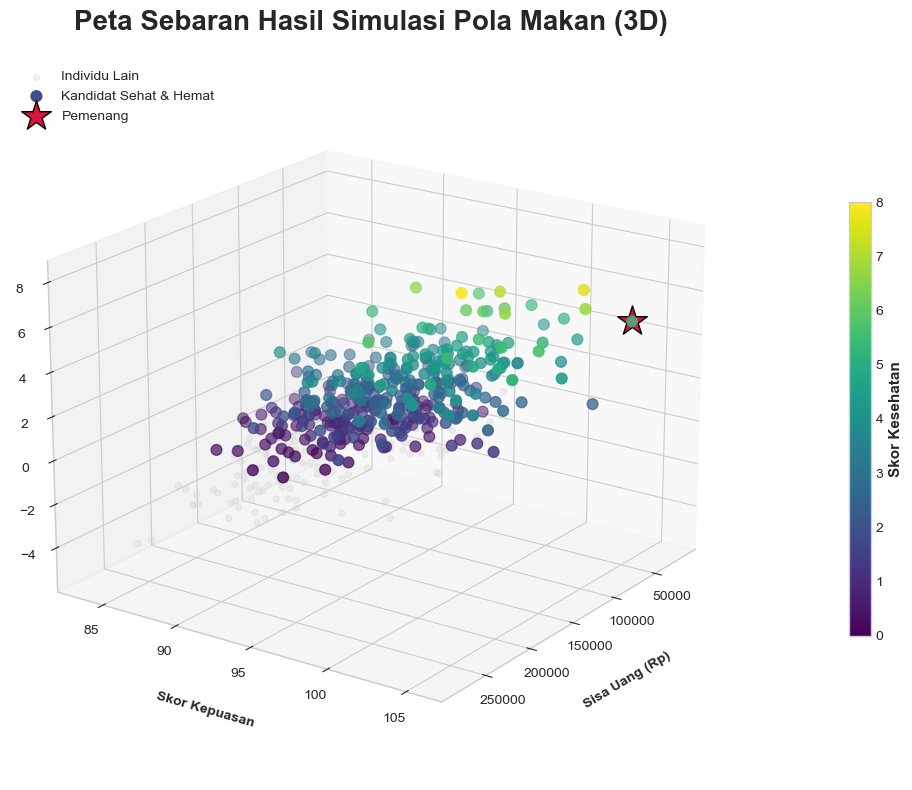


--- HASIL ANALISIS TUGAS ---
TUGAS (1): Pola makan mana saja yang sehat
Ditemukan 379 pola makan yang sehat.
Daftar ID (pola makan) individu: 
[  0   2   4   5   6   7   8   9  10  11  12  16  17  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  40  42  43  45  46  47
  48  49  50  51  53  54  56  57  58  59  60  61  62  64  65  67  68  69
  70  71  73  74  76  77  78  80  81  82  84  85  86  87  89  91  92  93
  95  97  98 100 101 102 103 104 105 106 107 109 110 113 114 115 116 118
 119 121 122 123 126 127 129 131 133 134 136 137 139 141 142 143 144 145
 146 148 149 150 153 154 155 157 158 160 161 164 166 167 169 170 171 172
 175 177 180 181 182 185 187 189 190 191 192 193 194 195 196 198 200 201
 203 204 206 207 208 209 211 212 213 214 215 216 217 218 220 221 222 223
 224 225 226 227 228 229 230 235 236 238 239 240 241 242 243 245 247 248
 254 255 256 257 258 259 261 262 263 264 267 269 270 271 272 273 274 275
 276 277 278 279 280 281 283 284 285 286 287 288 289 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

# ===============
# KODE PROGRAM
# ===============

makan = pd.read_csv("makanan.csv") 

# Inisialisasi 
NPM= 17
np.random.seed(NPM)

budget= 1e5

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihanku= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=int) 
# Tipe data `resp_pilih` diubah dari `np.double` menjadi `int` karena  digunakan untuk menyimpan nomor indeks makanan 

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0
    
    for i in range(0, 31): # hari
        # makan pertama
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] + \
            w_rasa * makan['rasa'][pilihan] + \
            w_sehat * makan['sehat'][pilihan] - \
            w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")   
        resp_pilih[n][2*i]= pilihan # Angka `1` diubah menjadi variabel `i` Agar jadwal makan tercatat untuk setiap hari
        
        # makan kedua
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] + \
            w_rasa * makan['rasa'][pilihan] + \
            w_sehat * makan['sehat'][pilihan] - \
            w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")   
        resp_pilih[n][2*i+1]= pilihan   # Angka `1` diubah menjadi variabel `i` untuk mencatat makan kedua setiap hari
    
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    idx_sisa = int((budget - SISA_MININUM) / 1000)  # Baris ini dibungkus dengan kondisi `if` untuk mencegah eror.
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = skor_sehat

# ===================
# VISUALISASI HASIL
# ===================

# Tentukan dulu kandidat yang sehat dan hemat
idx_sehat_dan_hemat = np.where((sehat > 0) & (sisa > 0))[0]
# ID pemenang dari kandidat tersebut
# Pemenang adalah yang punya 'skor' tertinggi di antara kandidat 'sehat & hemat'
skor_kandidat = skor[idx_sehat_dan_hemat]
posisi_pemenang_relatif = np.argmax(skor_kandidat)
id_pemenang = idx_sehat_dan_hemat[posisi_pemenang_relatif]

# Mengatur gaya plot
style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
# Menampilkan semua 500 individu sebagai latar belakang
ax.scatter(sisa, skor, sehat, c='lightgrey', marker='o', alpha=0.3, label='Individu Lain')
# Menampilkan kandidat "Sehat & Hemat" dan menyimpan hasilnya ke variabel `sc`
sc = ax.scatter(sisa[idx_sehat_dan_hemat], skor[idx_sehat_dan_hemat], sehat[idx_sehat_dan_hemat], 
                c=sehat[idx_sehat_dan_hemat], cmap='viridis', marker='o', s=60, label='Kandidat Sehat & Hemat')
# Menandai sang pemenang
ax.scatter(sisa[id_pemenang], skor[id_pemenang], sehat[id_pemenang], 
            c='crimson', marker='*', s=500, edgecolor='black', zorder=10, label=f'Pemenang')
# Menambahkan judul dan label sumbu
ax.set_title('Peta Sebaran Hasil Simulasi Pola Makan (3D)', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Sisa Uang (Rp)', fontweight='bold', labelpad=15)
ax.set_ylabel('Skor Kepuasan', fontweight='bold', labelpad=15)
ax.set_zlabel('Skor Kesehatan', fontweight='bold', labelpad=15)
# Menampilkan legenda dan color bar
ax.legend(loc='upper left', fontsize=10)
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Skor Kesehatan', fontsize=11, fontweight='bold')
# Mengatur sudut pandang kamera 3D
ax.view_init(elev=20, azim=35)
# Gunakan tight_layout untuk membantu merapikan
plt.tight_layout()
plt.show()

# =============================
# KODE UNTUK MENJAWAB TUGAS
# =============================
print("\n--- HASIL ANALISIS TUGAS ---")

# (1) Cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan positif
idx_sehat = np.where(sehat > 0)[0]
print(f"TUGAS (1): Pola makan mana saja yang sehat")
print(f"Ditemukan {len(idx_sehat)} pola makan yang sehat.")
print(f"Daftar ID (pola makan) individu: \n{idx_sehat}\n")

# (2) Cari titik-titik dengan sisa uang bulanan positif dari (1)
idx_sehat_dan_hemat = np.where((sehat > 0) & (sisa > 0))[0]
print(f"TUGAS (2): Titik mana saja yang memiliki sisa uang positif")
print(f"Dari daftar di atas, ditemukan {len(idx_sehat_dan_hemat)} titik yang juga memiliki sisa uang positif.")
print(f"Daftar ID (titik) individu: \n{idx_sehat_dan_hemat}\n")

# (3) Cari titik dengan skor kumulatif terbesar di antara hasil (2)
print(f"TUGAS (3): Titik dengan skor terbesar")
if len(idx_sehat_dan_hemat) > 0:
    skor_kandidat = skor[idx_sehat_dan_hemat]
    posisi_pemenang_relatif = np.argmax(skor_kandidat)
    id_pemenang = idx_sehat_dan_hemat[posisi_pemenang_relatif]

    print(f"Titik dengan skor kumulatif terbesar ditemukan pada individu ID: {id_pemenang}")
    print(f"  - Skor Kumulatif Tertinggi: {skor[id_pemenang]:.2f}")
    print(f"  - Skor Kesehatan: {sehat[id_pemenang]:.2f}")
    print(f"  - Sisa Uang: Rp {sisa[id_pemenang]:,.2f}\n")

    # (4) Tampilkan jadwal makanan sesuai pilihan (resp_pilih)
    print(f"TUGAS (4): Tampilan Jadwal Makanan (dari 'resp_pilih') untuk ID {id_pemenang}")
    
    jadwal_pemenang = []
    pilihan_pemenang = resp_pilih[id_pemenang]
    
    for hari in range(31):
        makan_pagi_idx = pilihan_pemenang[hari * 2]
        makan_malam_idx = pilihan_pemenang[hari * 2 + 1]
        
        nama_makan_pagi = makan['makanan'].iloc[makan_pagi_idx]
        nama_makan_malam = makan['makanan'].iloc[makan_malam_idx]
        
        jadwal_pemenang.append([f"Hari {hari+1}", nama_makan_pagi, nama_makan_malam])

    df_jadwal = pd.DataFrame(jadwal_pemenang, columns=['Hari', 'Makan Pertama', 'Makan Kedua'])
    print(df_jadwal.to_string())
else:
    print("Tidak ditemukan individu yang memenuhi kriteria untuk tugas (3) dan (4).")